# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


PACE stages



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

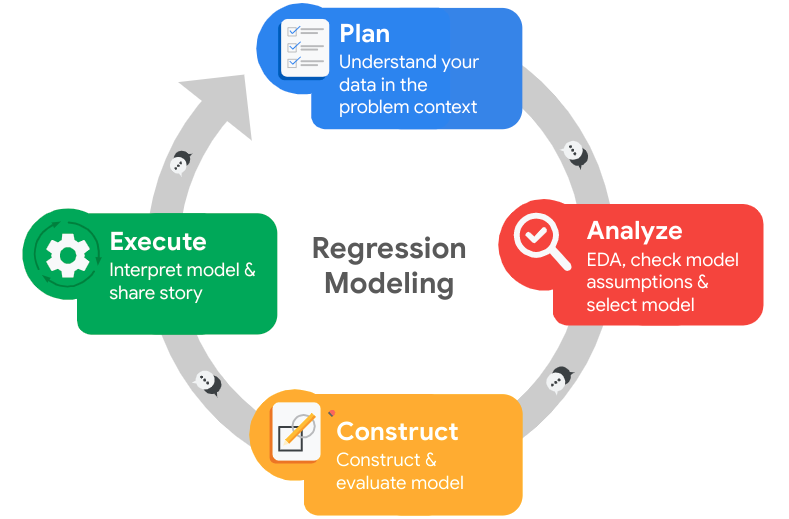



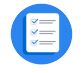

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




### Enter your responses here:

1. #### Who are your stakeholders for this project?
    * Salifort’s senior leadership team: they concerned about how many employees are leaving the company.
    * Human Resources: who survey a sample of employees to learn more about what might be driving turnover.
    * Leadership team: who ask us to analyze the survey data and come up with ideas for how to increase employee retention. They also suggest us design a model that predicts whether an employee will leave the company based on their job title, department, number of projects, average monthly hours, and any other relevant data points.
    * Leadership team: we will need to analyze the key factors driving employee turnover, build an effective model, and share recommendations for next steps with them
    
1. #### What are you trying to solve or accomplish?
<br>
Our purpose: to increase employee retention
<br>
Our goal: to learn more about what might be driving turnover, then better understand the problem and develop a solution
<br>

1. #### What are your initial observations when you explore the data?

    1. By checking the dataset info, we notice `Department` and `salary` are objects. We think they are all categorical variables, we will transform them later. 
    1. The dataset doesn't contain the missing value.
    1. This dataset has duplicated values.
    1. In the `last_evaluation` column, the minimum score was 0.36, it doesn't contain the score below to 0.36.
    1. In the `average_monthly_hours` column, it has a very large standard deviation as well as the range.
    1. The `time_spend_company` has a similar situation as the `last_evaluation` column, there is no data for employees who worked less than 2 years.
    1. `left` will be our target variable. We realize the majority class is about 76% of the dataset, it is moderate (< 20%) imbalance. 
    1. There are 10 `Department`(s) in this dataset, how many departments are there in Salifort Motors?
    1. There are 3 `salary` levels in this dataset. To better understand this variable, we'd better know how the levels are made.
    1. There are some outliers in the `time_spend_company` variable (probably in other variables too), but since we are going to use a Tree-based model which is less sensitive to the outliers, we are not going to remove those outliers.

1. #### What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

    * By searching online, we understood the `snake_case` is a variable naming convention where each word is in lower case, and separated by underscores. Link:https://en.wikipedia.org/wiki/Snake_case
    
    * By searching on the internet, employee tenure means someone who has worked for a company or organization for a number of years. In this case, time_spend_company is the variable we talk about now.
    Link: https://www.hibob.com/hr-glossary/employee-tenure/#:~:text=Employee%20tenure%2C%20or%20job%20tenure,criterion%20for%20hiring%20new%20people.
    
1. #### Do you have any ethical considerations in this stage?

    * Before I started working on this project, I concerned about the 'volunteer bias' in this dataset, as all the information was reported by 'self-reported' method.
    * The dataset has more data representing the employees who did not leave.
    * As we mentioned for the issue of department, does every department of the company have been included in the dataset?




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ###

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


By checking the info, we notice `Department` and `salary` are objects. We think they are all categorical variables, we will figure it out later. In addition, it should not contain the missing value. 

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


By checking the description data, we notice:
<br>
1. In the `last_evaluation` column, the minimum score was 0.36, it doesn't contain the score below to 0.36.
1. In the `average_monthly_hours` column, it has a very large standard deviation as well as the range.
1. The `time_spend_company` has a similar situation as the `last_evaluation` column, there is no data for employees who worked less than 2 years.
1. `left` will be our target variable.
1. There are 10 `Department`(s) in this dataset, how many departments are there in Salifort Motors?
1. There are 3 `salary` levels in this dataset.

Let's check the balance of this dataset.

In [5]:
df0['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

It is an imbalanced dataset, as it has lots more data that present the employees who have not left, let's take a look at how serious this issue is.

In [6]:
print("The percentage of majority class is:", round((len(df0[df0['left']==0])/df0.shape[0]) *100, 2))

The percentage of majority class is: 76.19


We consider the dataset is moderate (< 20%) imbalance, but we don't need to rebalance it.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

By searching online, we understood the `snake_case` is a variable naming convention where each word is in lower case, and separated by underscores. 

In [7]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns = {'Work_accident':'work_accident', 'Department':'department', 'average_montly_hours':'average_monthly_hours'}, inplace = True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

We mentioned in the info() section, there is no missing value in this dataset, now we proved it.

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
### YOUR CODE HERE ###
print(df0.drop_duplicates().shape)
print(df0.shape)

(11991, 10)
(14999, 10)


In [11]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0_duplicated = df0[df0.duplicated() == True]
df0_duplicated

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [12]:
df0_duplicated['left'].value_counts()

1    1580
0    1428
Name: left, dtype: int64

We were concerned that if we drop the duplicates, the dataset is going to be even more imbalanced. After we count the values of duplicates, we can see both of the classes have the duplicates.

In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates()
df.reset_index(inplace = True, drop = True)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


Even though there are chances to have completely the same information with different employees, since we don't have identification info and we don't know if they are truly the same person. We still dropped the duplicates for the following reasons:
1. We will still have 11991 data after we dropped the duplicates.
1. Both of the classes have the duplicates, dropping the rows won't have a serious impact on the balance of the dataset.
1. In order to keep our model more fair, dropping the duplicates is going to be better than not to drop them.

### Check outliers

Check for outliers in the data.

By searching on the internet, employee tenure means someone who has worked for a company or organization for a number of years. In this case, `time_spend_company` is the variable we talk about now.

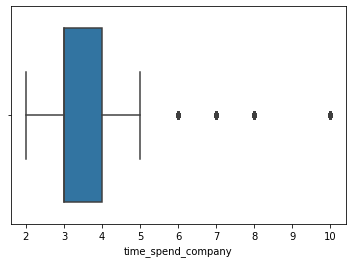

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

sns.boxplot(df['time_spend_company'])


There are some outliers in the `time_spend_company` variable.

In [15]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

tenure_iqr = df['time_spend_company'].quantile(0.75) - df['time_spend_company'].quantile(0.25)
tenure_upper_limit = df['time_spend_company'].quantile(0.75) + 1.5 * tenure_iqr
tenure_lower_limit = df['time_spend_company'].quantile(0.25) - 1.5 * tenure_iqr

df.loc[(df['time_spend_company'] > tenure_upper_limit) | (df['time_spend_company'] < tenure_lower_limit)]


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11985,0.22,0.94,3,193,10,0,0,1,management,high
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

A: Since we are going to use a tree-based model which is less sensitive to the outliers, we are not going to remove the outliers.

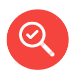
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




### Enter your responses here:

1. #### What did you observe about the relationships between variables?
    * The employees who left the company tended to have lower satisfaction levels than the employees who stayed in the company.
    * The lowest satisfaction level scores were more likely given by the employees who have left the company, but we still see numbers of stayed employees given very low satisfaction scores. 
    *  The employees who left the company had a similar but an average higher score in the last performance than the employees who stayed in the company.
    * When the employees only have 2 projects, the possibilities of turnover are the most compared to other numbers of projects. When the employees have 3 projects, the possibilities of turnover is smallest. When project number goes higher, the chance of turnover goes higher, at the same time, the possibilities of stay decreases. In addition, all the employees are left when they have 7 projects.
    * The employees who left the company had more average monthly work hours than the employees who stayed in the company.
    * The employees who work in the company longer tend to have more possibilities of leaving.
    * The employees who didn't experience an accident while at work have more possibilities of staying in the company.
    * The employees who were promoted in the last 5 years had more possibilities to stay in the company.
    * The department of management has the lowest number of leaving, and the sales department has the highest number of leaving, compared to other departments in the dataset.
    * When the salary level goes up, the possibility of leaving is decreased. At the same time, the possibility of staying in the company has also decreased.
    * `satisfaction_level` has more relationship with `left`, compared to other variables. In addition, there are no variables that are highly related to other variables.
    
1. #### What do you observe about the distributions in the data?
    * We see the lowest satisfaction level is below 0.1, and it has a large number of employees who had the similar rate. Other than that, there are also a large number of the employees who had a satisfaction level higher than 0.56.
    * By checking the `average_monthly_hour`, we see 96 was the minimum monthly working hour, and 310 was the maximum monthly working hour. 149 and 156 are the most frequent monthly working hours.
    * There is a 63% of employees who work over 176 hours/month.
    * The percentage of employee who worked over 176 hours/month and left the company is around 14.56%
    
1. #### What transformations did you make with your data? Why did you chose to make those decisions?
    * We have encoded `department` and `salary` to dummy variables since they are caterical variables.
    
1. #### What are some purposes of EDA before constructing a predictive model?
    * To understand which variables are present in the data
    * To consider the distribution of features, such as minimum, mean, and maximum values
    * To plot the relationship between the independent and dependent variables and visualize which features have a linear relationship
    * To identify issues with the data, such as incorrect or missing values.



## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

1. A boxplot and a regplot of employee retention based on the `satisfaction_level`.

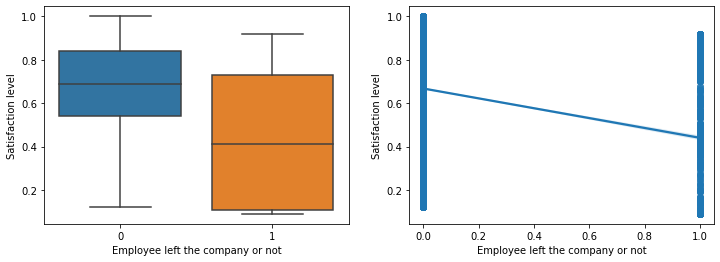

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###

fig, axes = plt.subplots(1,2,figsize = (12,4))
sns.boxplot(data = df, x = 'left', y = 'satisfaction_level', showfliers = False, ax=axes[0])  # Exclude the outliers
axes[0].set_xlabel("Employee left the company or not")
axes[0].set_ylabel("Satisfaction level")

sns.regplot(data = df, x = 'left', y = 'satisfaction_level', ax=axes[1])
axes[1].set_xlabel("Employee left the company or not")
axes[1].set_ylabel("Satisfaction level")


plt.show()

From the visualization, we can see the employees who left the company tended to have lower satisfaction levels than the employees who stayed in the company.

2. A histplot that shows the overall `satisfaction_level` for all employees in this dataset.

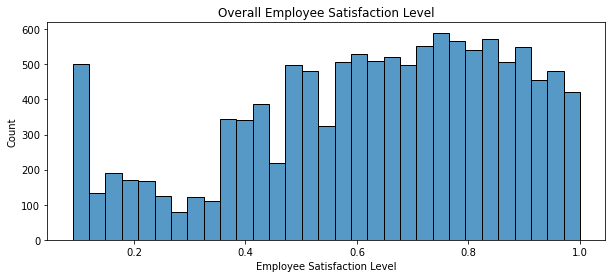

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###

plt.figure(figsize = (10,4))
sns.histplot(df, x = 'satisfaction_level')
plt.xlabel("Employee Satisfaction Level")
plt.title("Overall Employee Satisfaction Level")
plt.show()

From this histogram, we see the lowest satisfaction level is below 0.1, and it has a large number of employees who had the similar rate. Other than that, there are also a large number of the employees who had a satisfaction level higher than 0.56.

3. Let's compare two histogram plots of `satisfaction_level` based on if the employee left.

In [18]:
# Separate the dataset based on if the employee was left

df_stay = df[df['left'] == 0]
df_left = df[df['left'] == 1]

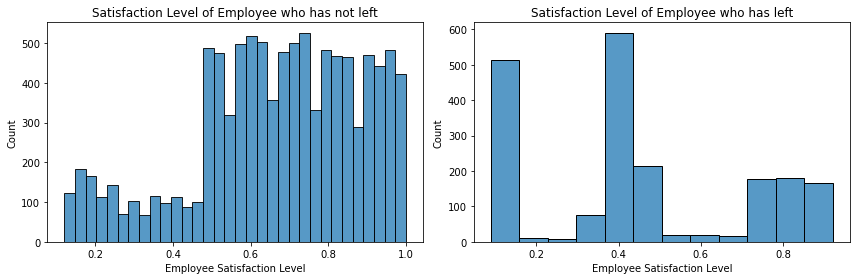

In [19]:
fig, axes = plt.subplots(1,2,figsize = (12,4))
sns.histplot(df_stay, x = 'satisfaction_level', ax=axes[0])
axes[0].set_xlabel("Employee Satisfaction Level")
axes[0].set_title("Satisfaction Level of Employee who has not left")

sns.histplot(df_left, x = 'satisfaction_level', ax=axes[1])
axes[1].set_xlabel("Employee Satisfaction Level")
axes[1].set_title("Satisfaction Level of Employee who has left")

plt.tight_layout()
plt.show()

We can tell the lowest satisfaction level scores were more likely given by the employees who have left the company, but we still see numbers of stayed employees given very low satisfaction scores. On the other hand, there are some employees who left the company have gave higher scores of satisfaction, we question it and will figure it out later.

4. A boxplot of employee retention based on the `last_evaluation`.

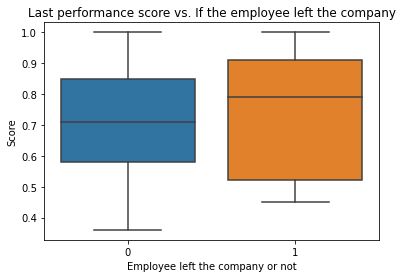

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.boxplot(data = df, y = 'last_evaluation', x = 'left')
plt.xlabel("Employee left the company or not")
plt.ylabel("Score")
plt.title("Last performance score vs. If the employee left the company")
plt.show()

In this boxplot, we can see the employees who left the company had a similar but an average higher score in the last performance than the employees who stayed in the company.

5. A countplot of employee retention based on the `number_project`

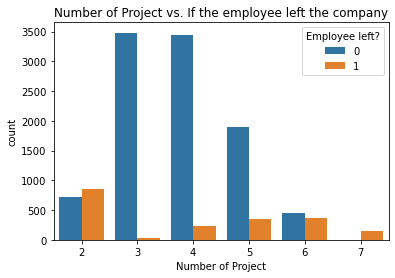

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.countplot(data = df, x = 'number_project', hue = 'left')
plt.xlabel("Number of Project")
plt.title("Number of Project vs. If the employee left the company")
plt.legend(title = "Employee left?")
plt.show()

In [22]:
print("The number of employees who had 7 projects and stayed in company:", len(df.loc[(df['number_project'] == 7) & (df['number_project'] == 0)]))

The number of employees who had 7 projects and stayed in company: 0


When the employees only have 2 projects, the possibilities of turnover are the most compared to other numbers of projects. When the employees have 3 projects, the possibilities of turnover is smallest. When project number goes higher, the chance of turnover goes higher, at the same time, the possibilities of stay decreases. In addition, all the employees are left when they have 7 projects.

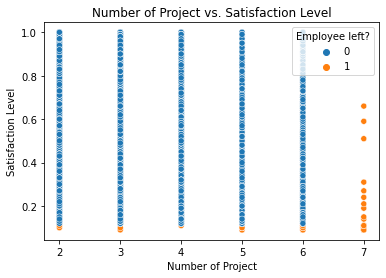

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.scatterplot(data = df, x = 'number_project', y = 'satisfaction_level', hue = 'left')
plt.xlabel("Number of Project")
plt.ylabel("Satisfaction Level")
plt.title("Number of Project vs. Satisfaction Level")
plt.legend(title = "Employee left?")
plt.show()

Now we can see: When the employees leave the company, the satisfaction level is very low, except when they have 7 projects, there are 8 employees who have given the satisfaction score more than 0.2. Combining the histogram of 'Satisfaction Level of Employee who has left we got over the `satisfaction_level` section, we concern the situation of 'there are some employees who left the company that have given higher scores of satisfaction' we mentioned was because of some other reasons.

6. A boxplot of employee retention based on the `average_monthly_hours`.

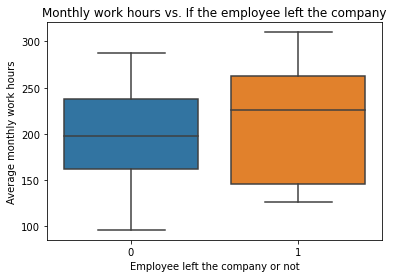

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.boxplot(data = df, x = 'left', y = 'average_monthly_hours')
plt.xlabel("Employee left the company or not")
plt.ylabel("Average monthly work hours")
plt.title("Monthly work hours vs. If the employee left the company")
plt.show()

In this boxplot, we can see the employees who left the company had more average monthly work hours than the employees who stayed in the company.

7. In the previous section, we mentioned that in the `average_monthly_hours` column, it has a very large standard deviation as well as the range. Let's examine it using a histogram.

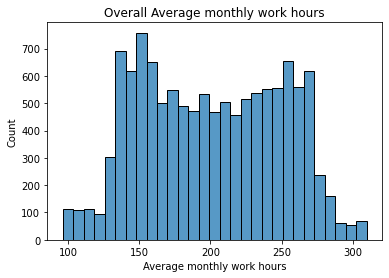

In [25]:
sns.histplot(df, x = 'average_monthly_hours')
plt.xlabel("Average monthly work hours")
plt.title("Overall Average monthly work hours")
plt.show()

In [26]:
df['average_monthly_hours'].mode()

0    149
1    156
dtype: int64

It shows the same sign that 96 was the minimum monthly working hour, and 310 was the maximum monthly working hour. 149 and 156 are the most frequent monthly working hours.

According to Zippia.com, there are an average of around 176 work hours in a month.
<br>
Link: https://www.zippia.com/answers/how-many-work-hours-are-in-a-month/
<br>
In this case, any `average_monthly_hours` larger than ~176 are considered as working over time. To keep this in mind, let's examine the percentage of employees who worked over 176 hours/month.

In [27]:
ot_len = (len(df[df['average_monthly_hours'] > 176])/df['average_monthly_hours'].shape[0]) *100
print(f"The percentage of employees who worked over 176 hours/month: {ot_len:.2f}%")

The percentage of employees who worked over 176 hours/month: 63.06%


There is a very large percentage of employees who work over 176 hours/month. We should take a look at how much percentage of employees left the company as well as their satisfaction level when they worked over 176 hours/month.

In [28]:
ot = df[df['average_monthly_hours'] > 176]
        
print("The number of employee who worked over 176 hours/month in both of classes:\n", ot['left'].value_counts())
print("\n")
print("The percentage of employee who worked over 176 hours/month and left the company:", round((len(ot[ot['left']==1])/ot.shape[0]) *100, 2))
print("\n")
print("The satisfaction level of employee who worked over 176 hours/month", ot['satisfaction_level'].describe())

The number of employee who worked over 176 hours/month in both of classes:
 0    6460
1    1101
Name: left, dtype: int64


The percentage of employee who worked over 176 hours/month and left the company: 14.56


The satisfaction level of employee who worked over 176 hours/month count    7561.000000
mean        0.644238
std         0.251796
min         0.090000
25%         0.520000
50%         0.690000
75%         0.840000
max         1.000000
Name: satisfaction_level, dtype: float64


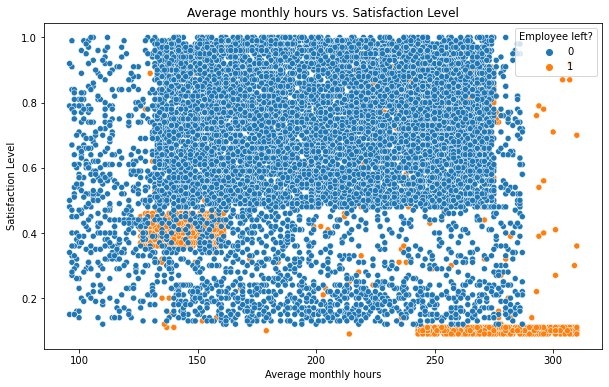

In [29]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left')
plt.xlabel("Average monthly hours")
plt.ylabel("Satisfaction Level")
plt.title("Average monthly hours vs. Satisfaction Level")
plt.legend(title = "Employee left?")
plt.show()

This scatterplot shows us that employees who work between 250hr/month and 300hr/month tend to have very low satisfaction scores. Combining the histogram we had in the `satisfaction_level` section, most of the lowest scores came from here. Another big group of left employees had monthly work hours around 130-170 hr/month, their satisfaction levels are below the average.

8. A boxplot and a regplot of employee retention based on the `time_spend_company`.

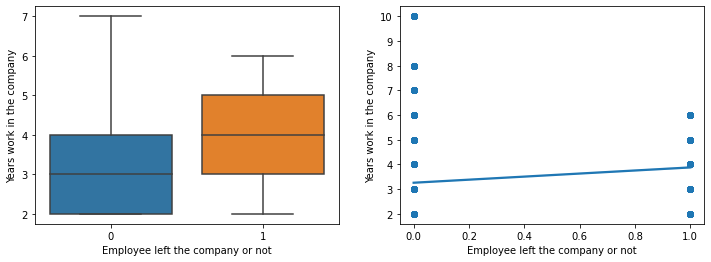

In [30]:
# Create a plot as needed
### YOUR CODE HERE ###

fig, axes = plt.subplots(1,2,figsize = (12,4))
sns.boxplot(data = df, x = 'left', y = 'time_spend_company', showfliers = False, ax=axes[0])  # Exclude the outliers
axes[0].set_xlabel("Employee left the company or not")
axes[0].set_ylabel("Years work in the company")

sns.regplot(data = df, x = 'left', y = 'time_spend_company', ax=axes[1])
axes[1].set_xlabel("Employee left the company or not")
axes[1].set_ylabel("Years work in the company")


plt.show()

By checking out the boxplot and regplot, the employees who work in the company longer tend to have more possibilities of leaving.

9. A countplot of employee retention based on the `work_accident`.

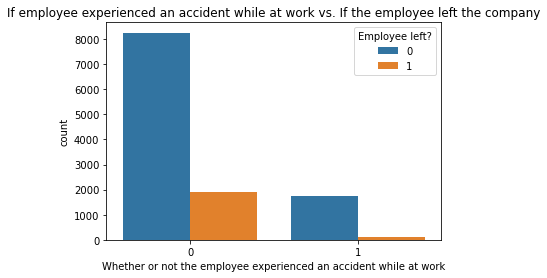

In [31]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.countplot(df['work_accident'], hue = df['left'])
plt.xlabel("Whether or not the employee experienced an accident while at work")
plt.title("If employee experienced an accident while at work vs. If the employee left the company")
plt.legend(title = "Employee left?")
plt.show()

Through this plot, we can see that the employees who didn't experience an accident while at work have more possibilities of staying in the company.

10. A countplot of employee retention based on the `promotion_last_5years` 

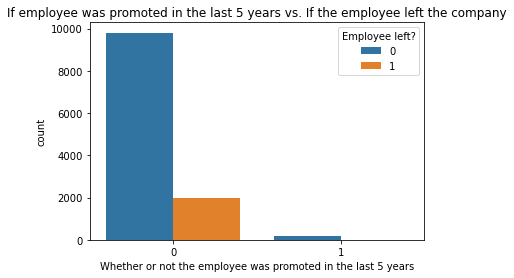

In [32]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.countplot(df['promotion_last_5years'], hue = df['left'])
plt.xlabel("Whether or not the employee was promoted in the last 5 years")
plt.title("If employee was promoted in the last 5 years vs. If the employee left the company")
plt.legend(title = "Employee left?")
plt.show()

We are not able to tell the information of employees who were promoted in the last 5 years. Let's do some calculation and see if we can get more details of it.

In [33]:
df['promotion_last_5years'].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In [34]:
df_promotion = df[df['promotion_last_5years'] ==1]
df_nopromotion = df[df['promotion_last_5years'] ==0]

df_promotion_stay_perc = (len(df_promotion[df_promotion['left'] == 0])/df_promotion.shape[0])*100
df_promotion_left_perc = (len(df_promotion[df_promotion['left'] == 1])/df_promotion.shape[0])*100
df_nopromotion_stay_perc = (len(df_nopromotion[df_nopromotion['left'] == 0])/df_nopromotion.shape[0])*100
df_nopromotion_left_perc = (len(df_nopromotion[df_nopromotion['left'] == 1])/df_nopromotion.shape[0])*100

print(f"The percentage of the employees who were promoted in the last 5 years and stayed in the company: {df_promotion_stay_perc:.2f}%")
print(f"The percentage of the employees who were promoted in the last 5 years and left the company: {df_promotion_left_perc:.2f}%")
print(f"The percentage of the employees who were not promoted in the last 5 years and stayed in the company: {df_nopromotion_stay_perc:.2f}%")
print(f"The percentage of the employees who were not promoted in the last 5 years and left the company: {df_nopromotion_left_perc:.2f}%")

The percentage of the employees who were promoted in the last 5 years and stayed in the company: 96.06%
The percentage of the employees who were promoted in the last 5 years and left the company: 3.94%
The percentage of the employees who were not promoted in the last 5 years and stayed in the company: 83.18%
The percentage of the employees who were not promoted in the last 5 years and left the company: 16.82%


Even though in this dataset, we only have 203 employees who were promoted in the last 5 years, we can still see the employees who were promoted in the last 5 years had more possibilities to stay in the company.

11. Two countplots of employee retention based on the `department`.

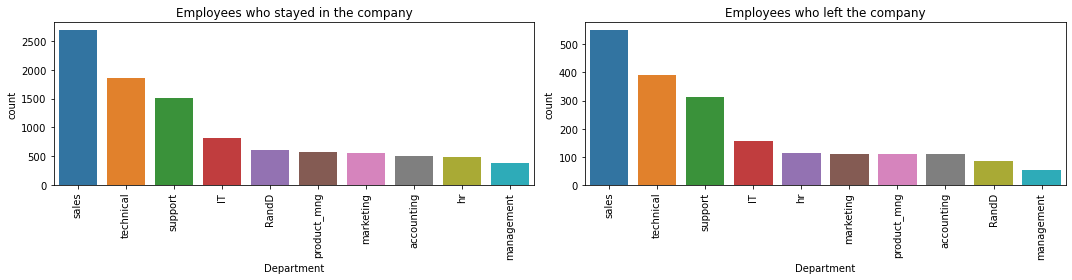

In [35]:
# Create a plot as needed
### YOUR CODE HERE ###

fig, axes = plt.subplots(1,2,figsize=(15,4))
sns.countplot(df_stay['department'], order=df_stay['department'].value_counts(ascending=False).index, ax=axes[0])
axes[0].set_xlabel("Department")
axes[0].set_title("Employees who stayed in the company")
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(df_left['department'], order=df_left['department'].value_counts(ascending=False).index, ax=axes[1])
axes[1].set_xlabel("Department")
axes[1].set_title("Employees who left the company")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Through the plots, we can see the department of management has the lowest number of leaving, and the sales department has the highest number of leaving, compared to other departments in the dataset.

11. A countplots of employee retention based on the `salary` (level).

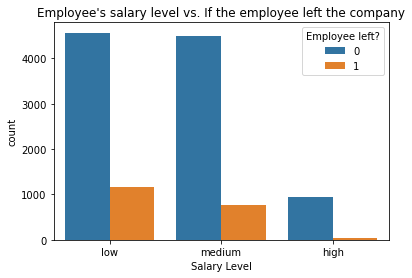

In [36]:
sns.countplot(df['salary'], hue = df['left'])
plt.xlabel("Salary Level")
plt.title("Employee's salary level vs. If the employee left the company")
plt.legend(title = "Employee left?")
plt.show()

From this plot, we can see that when the salary level goes up, the possibility of leaving is decreased. At the same time, the possibility of staying in the company has also decreased.

12. The heatmap that shows the correlation between the `left` and other variables.
<br>

`department` and `salary` are not included in this plot.

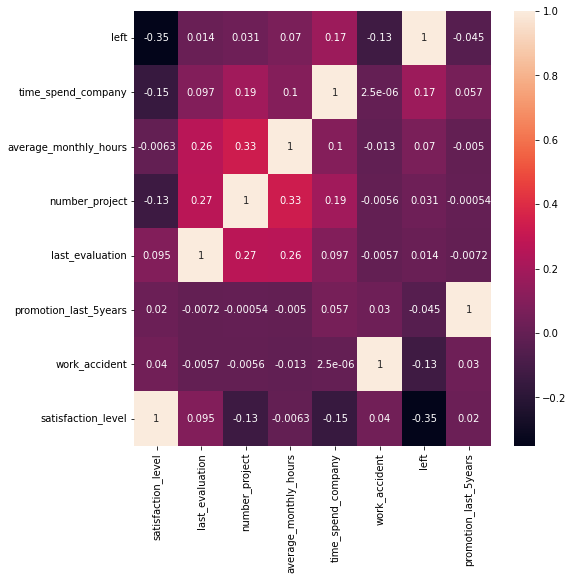

In [37]:
df_corr = df.corr().sort_values(by = 'left', ascending = False)

plt.figure(figsize = (8,8))
sns.heatmap(df_corr, annot=True)

As we can see, `satisfaction_level` has more relationship with `left`, compared to other variables. In addition, there are no variables that are strongly related to other variables.

### 	Insights

By checking more data and the visualization, we have some more insights to share:
<br>
1. We could see the employees who left the company usually spent more time on the project, the reason can be: 1) less investment in training, and upskilling; 2)get more complicated projects that need more time of working; 3) less familiar with the project...etc. In addition, the employees who worked for 7 projects were all left. Overflow seems like an issue of the company.
2. When the employees have worked with the company between 3-5 years, when they need to work over time, they have high possibilities to leave. But after 6 years, they may get used to working over time or overflow.
3. We can see all the employees who had 7 projects were working under 5 years. We are concerned about whether the projects have been given to employees fairly.

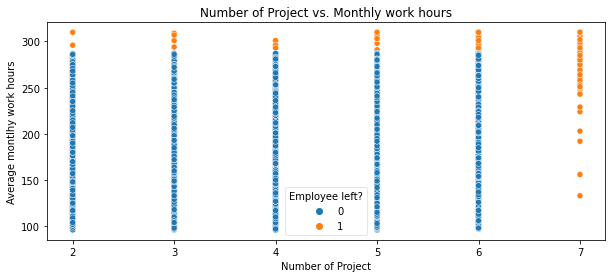

In [70]:
# Plot for Insights # 1

plt.figure(figsize = (10,4))
sns.scatterplot(data = df, x = 'number_project', y = 'average_monthly_hours', hue = 'left')
plt.xlabel("Number of Project")
plt.ylabel("Average montlhy work hours")
plt.title("Number of Project vs. Monthly work hours")
plt.legend(title = "Employee left?", framealpha=0.5)
plt.show()

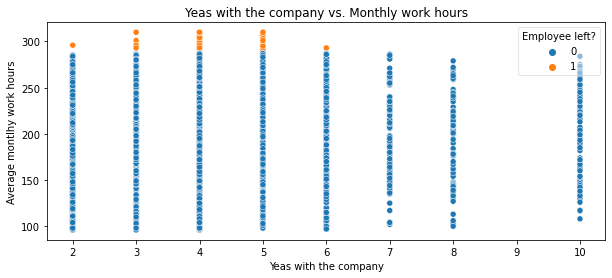

In [71]:
# Plot for Insights # 2

plt.figure(figsize = (10,4))
sns.scatterplot(data = df, x = 'time_spend_company', y = 'average_monthly_hours', hue = 'left')
plt.xlabel("Yeas with the company")
plt.ylabel("Average montlhy work hours")
plt.title("Yeas with the company vs. Monthly work hours")
plt.legend(title = "Employee left?", framealpha=0.5)
plt.show()

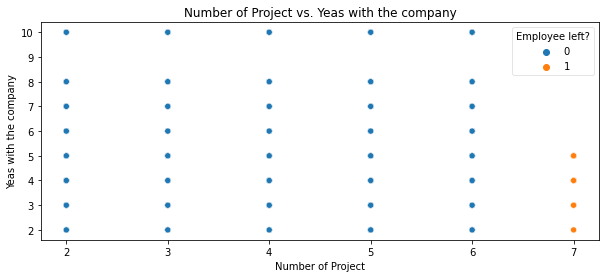

In [74]:
# Plot for Insights # 3

plt.figure(figsize = (10,4))
sns.scatterplot(data = df, x = 'number_project', y = 'time_spend_company', hue = 'left')
plt.xlabel("Number of Project")
plt.ylabel("Yeas with the company")
plt.title("Number of Project vs. Yeas with the company")
plt.legend(title = "Employee left?", framealpha=0.5)
plt.show()

### 	Preparation for model

1. Let's check the balance of dataset again.

In [38]:
# recall the balance info between leave and stay
df['left'].value_counts()

0    10000
1     1991
Name: left, dtype: int64

After we dropped the duplicates, the imbalance issue for this dataset is more serious than the original dataset. 

2. Data type

In [39]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

As we mentioned in the previous sections, we have two categorical variables can be encoded to dummies.

3. Encoding

In [40]:
df_model = pd.get_dummies(df, columns = ['department', 'salary'])
df_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


4. Now let's check the correlation heatmap again.

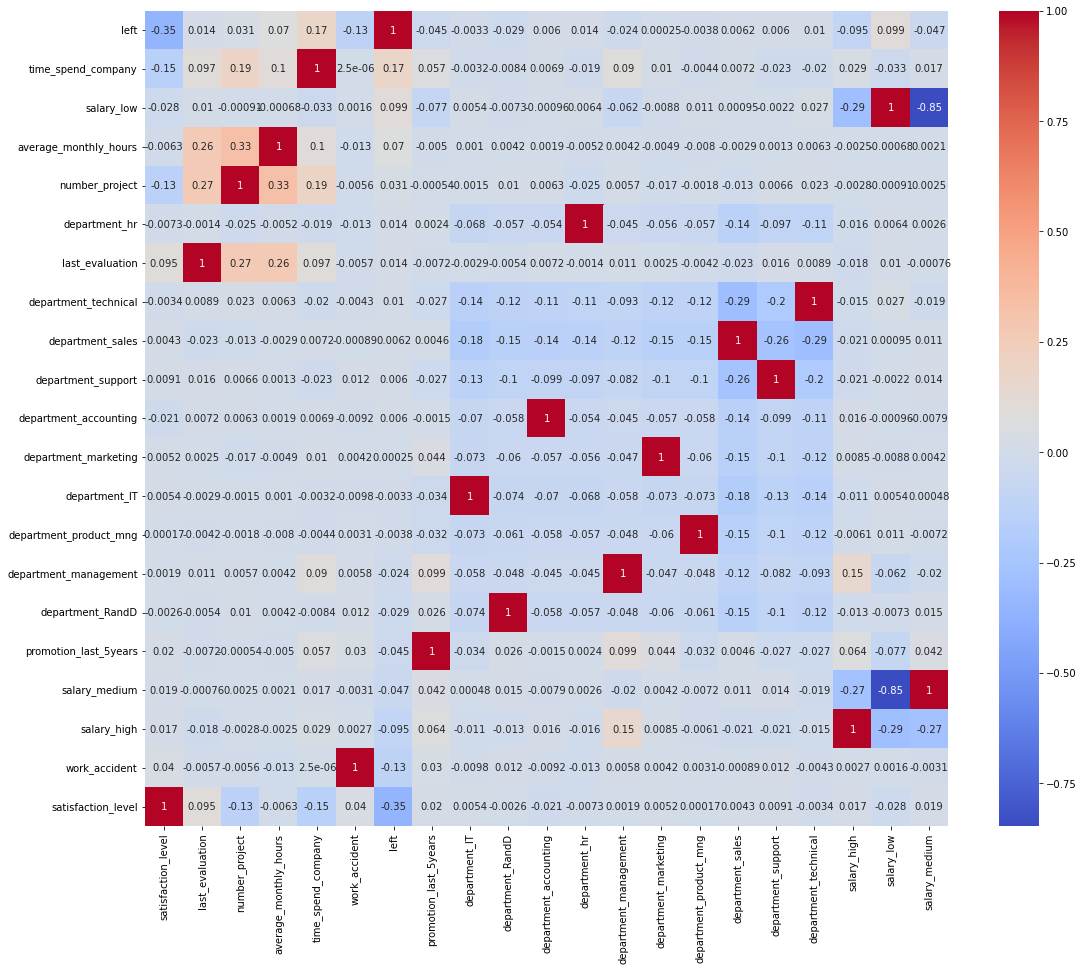

In [41]:
df_model_corr = df_model.corr().sort_values(by = 'left', ascending = False)

plt.figure(figsize = (18,15))
sns.heatmap(df_model_corr, annot=True, cmap = 'coolwarm')

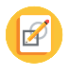
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

In this project, our goal is to build a model that predicts whether or not an employee will leave the company. In this case, we can choose either a logistic regression or a tree-based model.

### Identify the types of models most appropriate for this task.

We will build a Random Forest model and a XGBoost model for the following reasons:
1. This dataset contains outliers, a tree-based model is less sensitive about the outliers.
1. The tree-based models don't require scaling of features.
1. This dataset is imbalanced.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [42]:
# Split the data

y = df_model['left']
X = df_model.drop(['left'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

We will use f1 as the metrics, since our dataset is imbalanced, F1 scores are usually more useful than accuracy scores. If we care more about the false positives, it’s better to use the F1 score that combines the information from precision and recall.

1. ##### Random Forest

In [43]:
# Choose the parameters

rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [5, 6, 7], 
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [50, 100],
             }  

scoring = {'accuracy', 'precision', 'recall', 'f1'}

rf_model = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='f1')

In [44]:
%%time

rf_model.fit(X_train, y_train)

CPU times: user 1min 1s, sys: 88.9 ms, total: 1min 1s
Wall time: 1min 1s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [45]:
#Check the parameters of the best-performing model

rf_model.best_params_


{'max_depth': 7,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [46]:
# Check the best score

rf_model.best_score_

0.9474488970210523

In [47]:
# apply the best params into the model

rf_opt = RandomForestClassifier(n_estimators = 100, max_depth = 7, 
                                min_samples_leaf = 1, min_samples_split = 2,
                                max_features=1.0, max_samples = 0.7, random_state = 0)
rf_opt.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=1.0,
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [48]:
# Predict on test set

y_pred_rf = rf_opt.predict(X_test)

In [49]:
# Get 5 evaluation scores.

print('F1 score RF model: ', f1_score(y_test, y_pred_rf))
print('Recall score RF model: ', recall_score(y_test, y_pred_rf))
print('Precision score RF model: ', precision_score(y_test, y_pred_rf))
print('Accuracy score RF model: ', accuracy_score(y_test, y_pred_rf))
print('AUC score RF model: ', roc_auc_score(y_test, y_pred_rf))

F1 score RF model:  0.9565217391304347
Recall score RF model:  0.927710843373494
Precision score RF model:  0.9871794871794872
Accuracy score RF model:  0.9859906604402935
AUC score RF model:  0.9626554216867471


This model has pretty good evaluation scores using the Random Forest Model. Let's now try a XGBoost model and make a comparison.

2. ##### XGBoost

Note: To save more time, we have applied the optimized XGBoost model with the best hyperparameters. The running time for the original XGBoost model was about 15mins.

In [50]:
# Choose the hyperparameters

xgb = XGBClassifier(objective='binary:logistic', random_state=0)
cv_params = {'max_depth': [7, 9],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.01],
              'n_estimators': [100],
              'subsample': [1.0],
              'colsample_bytree': [1.0]
              }
scoring = {'accuracy', 'precision', 'recall', 'f1'}   
xgb_model = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [51]:
%%time

xgb_model.fit(X_train, y_train)

CPU times: user 41.8 s, sys: 319 ms, total: 42.2 s
Wall time: 21.2 s


GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': 

In [52]:
xgb_model.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 1.0}

In [53]:
xgb_model.best_score_

0.9473627757070782

In [54]:
# Predict on the test data

y_pred_xgb = xgb_model.predict(X_test)

In [55]:
# Get 5 evaluation scores.

print('F1 score XGB model: ', f1_score(y_test, y_pred_xgb))
print('Recall score XGB model: ', recall_score(y_test, y_pred_xgb))
print('Precision score XGB model: ', precision_score(y_test, y_pred_xgb))
print('Accuracy score XGB model: ', accuracy_score(y_test, y_pred_xgb))
print('AUC score XGB model: ', roc_auc_score(y_test, y_pred_xgb))

F1 score XGB model:  0.9525773195876289
Recall score XGB model:  0.927710843373494
Precision score XGB model:  0.9788135593220338
Accuracy score XGB model:  0.9846564376250834
AUC score XGB model:  0.961855421686747


3. ##### Conclusion

By checking the evaluation scores for both of the models, we'd decide to use the Random Forest model (with optimized) which has a slightly higher F1 and AUC scores compared to the XGBoost model. In addition, the Random Forest model took much less running time than the XGBoost model.

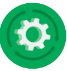
# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






In [56]:
# Recall the evaluation metrics for Random Forest model

print('F1 score RF model: ', f1_score(y_test, y_pred_rf))
print('Recall score RF model: ', recall_score(y_test, y_pred_rf))
print('Precision score RF model: ', precision_score(y_test, y_pred_rf))
print('Accuracy score RF model: ', accuracy_score(y_test, y_pred_rf))
print('AUC score RF model: ', roc_auc_score(y_test, y_pred_rf))

F1 score RF model:  0.9565217391304347
Recall score RF model:  0.927710843373494
Precision score RF model:  0.9871794871794872
Accuracy score RF model:  0.9859906604402935
AUC score RF model:  0.9626554216867471


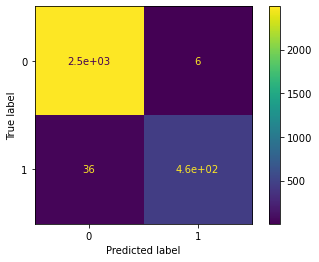

In [57]:
# plot a confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred_rf, labels = rf_opt.classes_)  # Use the optimized model
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf_opt.classes_)
disp.plot()


Even though we decided to use the Random Forest model, the feature importance is still a useful function for us to get more insides.

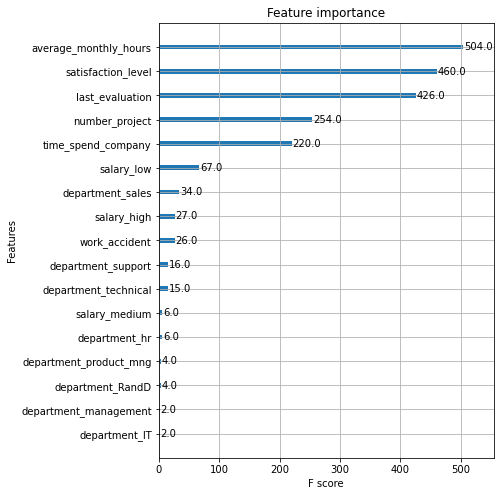

In [58]:
plt.rcParams["figure.figsize"] = (6, 8)
plot_importance(xgb_model.best_estimator_);

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- What business recommendations do you propose based on the models built?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



### Enter your responses here.

1. #### What key insights emerged from your model(s)?
    * By plotting the most important feature, we notice `average_monthly_hours`, `satisfaction_level` and `last_evaluation` are the top 3 important features for predicting if an employee will leave or not.
    * Compared to different `salary` (level), the employees who have a low salary will likely lead the retention of the company.
    * Compared to different `department`, the employees in the sales department will likely lead the retention of the company.
    
1. #### What potential recommendations would you make to your manager/company?
    * Our dataset has much less data for the employees who were left than the employees who stayed. It also impacts our evaluation results and confusion matrix. We recommend gaining more data for the employees who were left.
    * We only have 10 departments in this dataset, it's better to know how many departments there are in the company.
    * For the `salary`, it's better to build this feature with numerical data that shows how much the employee earns in a certain period of time. The level of salary is not clear enough.
    
1. #### Do you think your model could be improved? Why or why not? How?
    * By checking the evaluation scores, we consider this model is good enough before we have more data of employees who were left.
    
1. #### What business recommendations do you propose based on the models built?
    * As we mentioned above, `average_monthly_hours` is the most important feature to drive employees' retention. Combining the EDA results, we found that 63% of employees in the company work over time. Plus the employees who left the company had more average monthly work hours than the employees who stayed in the company. We recommend significantly reducing the chance of working over time.
    * The employees who left the company usually spent more time on the project, the reason can be: 1) less investment in training, and upskilling; 2) get more complicated projects that need more time of working; 3) less familiar with the project...etc. We need to find the reasons in order to reduce the high rate of turnover.
    * Overflow seems like an issue for the company.
    * We are concerned about whether the projects have been given to employees fairly.
    * In `satisfaction_level`, we knew the employees who left the company tended to have lower satisfaction levels than the employees who stayed in the company. And satisfaction level is the second important feature of driving employees' retention. Other than the points we just mentioned, we also recommend working on analysing the trends of `satisfaction_level`.
    * As the low level of `salary` is likely to lead to the retention of the company, we can work with this group more in order to increase their satisfaction level.
    

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [59]:
# Recall the evaluation metrics for Random Forest model

print('F1 score RF model: ', f1_score(y_test, y_pred_rf))
print('Recall score RF model: ', recall_score(y_test, y_pred_rf))
print('Precision score RF model: ', precision_score(y_test, y_pred_rf))
print('Accuracy score RF model: ', accuracy_score(y_test, y_pred_rf))
print('AUC score RF model: ', roc_auc_score(y_test, y_pred_rf))

F1 score RF model:  0.9565217391304347
Recall score RF model:  0.927710843373494
Precision score RF model:  0.9871794871794872
Accuracy score RF model:  0.9859906604402935
AUC score RF model:  0.9626554216867471


### Summary of model results

1. F1 Score: 0.96
    * We suggest reasonable predictive power in this model.
1. Recall: 0.93
    * 93% of the employees' turnover are correctly detected as leaving.
1. Precision: 0.99
    * 99% of the employees who predicted as left are indeed left.
1. Accuracy: 0.985
    * 98.5% of the turnover are correctly predicted. But since this dataset is imbalanced, the accuracy score is not useful enough on predicting.
1. AUC: 96.2%
    * 96% of the predictions are correct across all classification thresholds.

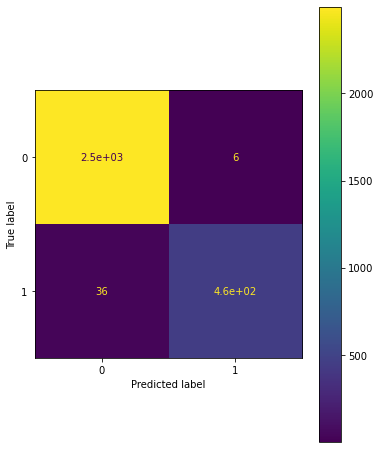

In [60]:
# recall a confusion matrix

cm = metrics.confusion_matrix(y_test, y_pred_rf, labels = rf_opt.classes_)  # Use the optimized model
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = rf_opt.classes_)
disp.plot()


In [61]:
cm

array([[2494,    6],
       [  36,  462]])

* True negatives: 2494 employees that were not left that the model accurately predicted were not left.
* False negatives: 36 employees that were left that the model inaccurately predicted were not left.
* False positives: 6 employees that were not left that the model inaccurately predicted were left.
* True positives: 462 employees were left that the model accurately predicted were left.


The False negatives may cause the company to spend more resources on an employee who decides to leave. The False positives may cause the company to think an employee will leave and won't put resources into this employee. False negatives will be worse for the company, false positives will be worse for employees. 

### Conclusion, Recommendations, Next Steps

1. We built a Random Forest model to predict whether or not an employee will leave the company, the f1 score is as high as 0.96 and AUC is around 0.96, which are the good of a prediction model.
1. We recommend the company reduce the chance of working over time and overflow. Also, setup a policy that can give the project fairly.
1. Invest the group who have lower salaries in order to increase their satisfaction level.
1. Increase the chance of promotion.
1. Next Steps:
    1. We should get more data of employees who left the company
    1. We can work on analysing the trends of satisfaction_level.
